# Big Data and AI
## Yelp Review Images Classification

## Setup

In [1]:
# Connect google drive to the Google Colab Runtime instance
from google.colab import files, drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# To extract train_photos (Not needed)
#!tar xvf '/content/drive/Shareddrives/Big Data New Drive/yelp/train_photos.tgz' -C '/content/drive/Shareddrives/Big Data New Drive/yelp/'

./._train_photos
train_photos/
train_photos/._10.jpg
tar: train_photos/._10.jpg: Cannot open: Input/output error
train_photos/10.jpg


## Pre-Processing

In [4]:
# Importing necessary libraries
import numpy as np
import h5py, os, cv2
import pandas as pd
import matplotlib.pyplot as plt 

In [42]:
Photo_Business_Lables_ID = pd.read_csv('/content/train_labels.csv',delimiter=",",names =['Photo_ID','Restaurant_ID','Target_Labels'])
Photo_Business_Lables_ID.head()

,Photo_ID,Restaurant_ID,Target_Labels
1,204149.0,3034,3 8
2,52779.0,2805,1 2 3 5 6 7
3,278973.0,485,1 2 3 4 5 6 7
4,195284.0,485,1 2 3 4 5 6 7
5,19992.0,485,1 2 3 4 5 6 7


In [43]:
y_train=Photo_Business_Lables_ID['Target_Labels'].str.get_dummies(sep=' ')
y_train.head()

,0,1,2,3,4,5,6,7,8
1,0,0,0,1,0,0,0,0,1
2,0,1,1,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1,0
4,0,1,1,1,1,1,1,1,0
5,0,1,1,1,1,1,1,1,0


In [ ]:
# This code is for pre-processing the images and converting the image files into one singular h5 file.

#X_Images = []
#train_path = "/content/drive/Shareddrives/Big Data New Drive/yelp/train_photos"
#for  ImgId in Photo_Business_Lables_ID["Photo_ID"]:
#    os.path.isfile(train_path) 
#    a = int(ImgId)
#
#    if(os.path.isfile(train_path + "/" + str(a) + ".jpg") == True):
#        img = train_path + "/" + str(a) + ".jpg"
#        img = cv2.imread(img)
#        img = cv2.resize(img,(100,100))
#        img = img.transpose((2,0,1))
#        X_Images.append(img)
#    else:
#        img = train_path + "/" + sstr(a) + ".jpg"
#        img = cv2.imread(img)
#        img = cv2.resize(img,(100,100))
#        img = img.transpose((2,0,1))
#        X_Images.append(img)

# The X_Images output was saved into the Images_with_labels.h5 file

In [11]:
# Import libraries for deep learning/CNN using keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [12]:
# Defining a function to load the data using the h5 file that we output above
def Train_Data_Loader():

    # Open file connection
    f = h5py.File("/content/drive/Shareddrives/Big Data New Drive/Images_with_labels.h5")

    # Getting only 150000 images since taking more images than that made the Colab RAM full, even on Colab Pro
    x = f['x'].value[:150000]
    y = f['y'].value[:150000]

    # Closing file connection
    f.close()

    x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
    
    return x_train, x_test, y_train, y_test 

In [13]:
# Getting train and test data
x_train_temp, x_test, y_train_temp, y_test = Train_Data_Loader()

x_train , x_val, y_train, y_val = train_test_split(x_train_temp,y_train_temp,test_size=0.2)

# Converting to float for normalization
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_val  = x_val.astype('float32')

# Normalizing the images
x_train /= 255
x_test /= 255
x_val /= 255

# Setting the image dimensions correctly for model training
x_train = tf.transpose(x_train, [0, 2, 3, 1])
x_test = tf.transpose(x_test, [0, 2, 3, 1])
x_val = tf.transpose(x_val, [0, 2, 3, 1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':


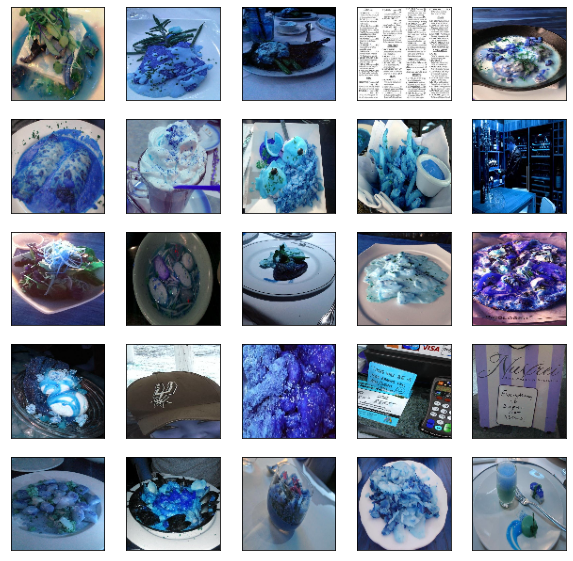

In [69]:
def image_grid():
  figure = plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
  return figure
figure = image_grid()

## Model Architecture and Training

In [14]:
# Set the channel format according to the input type. For the architecture github/KourHarpreet's CNN architecture is referred
K.set_image_data_format('channels_last')

# Define a sequntial model
model = Sequential()

# Add Convolution 2D layer
model.add(Convolution2D(32, kernel_size=(3, 3),padding='same',input_shape=(100, 100, 3)))
model.add(Activation('relu'))

# Add Convolution 2D layer
model.add(Convolution2D(64, (3, 3)))
# Add ReLU Activation function
model.add(Activation('relu'))
# MaxPool
model.add(MaxPooling2D(pool_size=(2, 2)))
# Random dropout
model.add(Dropout(0.3))

# Add Convolution 2D layer
model.add(Convolution2D(64,(3, 3), padding='same'))
# Add ReLU Activation function
model.add(Activation('relu'))

# Add Convolution 2D layer
model.add(Convolution2D(64, 3, 3))
# Add ReLU Activation function
model.add(Activation('relu'))
# MaxPool
model.add(MaxPooling2D(pool_size=(2, 2)))
# Random dropout
model.add(Dropout(0.3))

# Flatten the output
model.add(Flatten())
model.add(Dense(512))

# Add ReLU Activation function
model.add(Activation('relu'))
# Random dropout
model.add(Dropout(0.3))

# Final 9 outputs
model.add(Dense(9))

# Add Sigmoid Activation function
model.add(Activation('sigmoid'))

In [15]:
# Model Training using SGD
# Added momentum
sgd = SGD( lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)
# Add Binary Cross Entropy Loss for image classification
# Refer: https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/#:~:text=models%20in%20general.-,Cross%2Dentropy%20and%20mean%20squared%20error%20are%20the%20two%20main,when%20training%20neural%20network%20models.
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['AUC'])

In [16]:
# To check for metrics at the end of each epoch and saving model weights for future use
epoch_end_check = ModelCheckpoint( "weights.{epoch:02d}-{val_loss:.5f}.hdf5", monitor='loss', verbose=1, mode='auto')

In [17]:
# Train the model and save outputs into history for plotting and analytical purposes
history=model.fit(x_train, y_train, batch_size=100, epochs=20,callbacks=[epoch_end_check],validation_data=(x_val,y_val))

In [116]:
#print(history.history)

{'loss': [0.6115667819976807, 0.5823712348937988, 0.5730043649673462, 0.5664051175117493, 0.5614274740219116, 0.5579230785369873, 0.5545081496238708, 0.5520636439323425, 0.5495734810829163, 0.5470778942108154, 0.5448970794677734, 0.5425347089767456, 0.5401342511177063, 0.5387768745422363, 0.536861002445221, 0.5349892377853394, 0.533298134803772, 0.5317740440368652, 0.5299016833305359, 0.5287553071975708], 'auc': [0.7205096483230591, 0.7555168271064758, 0.7654825448989868, 0.772091269493103, 0.7770506739616394, 0.7803887128829956, 0.7837212681770325, 0.785885751247406, 0.7882869839668274, 0.7904531955718994, 0.7924754619598389, 0.7946304678916931, 0.7967000007629395, 0.7979947924613953, 0.799664318561554, 0.8013995289802551, 0.8028395175933838, 0.8041573762893677, 0.8058210015296936, 0.8069697618484497], 'val_loss': [0.5812554955482483, 0.5734856724739075, 0.5641905069351196, 0.5638343095779419, 0.5550986528396606, 0.5510832071304321, 0.5522941946983337, 0.5447477698326111, 0.5457451939

In [141]:
#model.summary()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


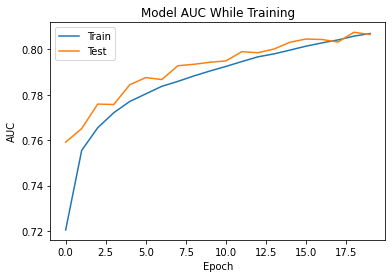

In [145]:
# Plot model AUC
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC While Training')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

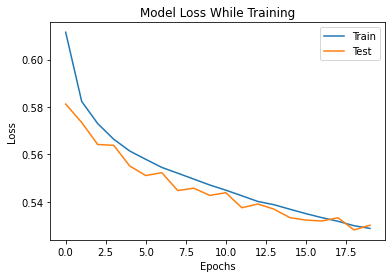

In [146]:
# Plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss While Training')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Test The model and Get F1 output

In [18]:
# Loading the model weights
model.load_weights("/content/weights.20-0.53012.hdf5")

In [19]:
# Predicting on test data
y_test_pred=model.predict(x_test)

In [20]:
# Setting threshold as 0.5
y_test_pred_class = (y_test_pred > 0.5) 

In [21]:
# Getting the F1 score
from sklearn.metrics import f1_score
f1score=f1_score(y_test_pred_class, y_test, average='micro')
print(f1score)

0.7390894087129231


## Example Illustration

In [31]:
# Defining a dictionary with the name of the classes
class_dict = {
  0: "Good for lunch",
  1: "Good for dinner",
  2: "Takes reservation",
  3: "Outdoor seating",
  4: "Restaurent is expensive",
  5: "Has alchohol",
  6: "Has Table Service",
  7: "Ambience is classy",
  8: "Good for kids",
}

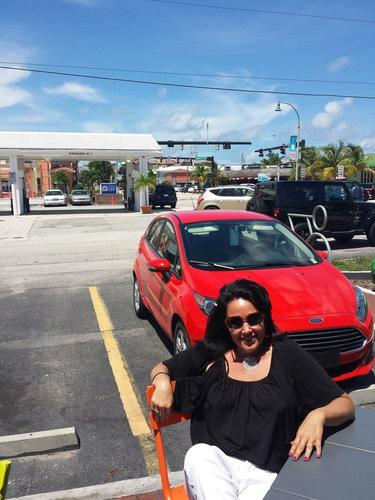

In [58]:
# Visualizing an image
from IPython.display import Image
img_path='test_1.jpg' # Change this to other images that you have to predict the output
Image(filename=img_path)

In [59]:
# Preprocess the test image
img = cv2.imread(img_path)
img = cv2.resize(img,(100,100))


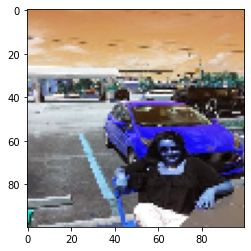

In [60]:
imgplot = plt.imshow(img)
plt.show()

In [61]:
img = img.astype('float32')
img = img/255
img = np.expand_dims(img,axis=0)

In [62]:
# Make prediction
Predict_output = model.predict(img)
Predict_output

array([[0.3545134 , 0.39416578, 0.4722278 , 0.6084591 , 0.2647169 ,
        0.5947623 , 0.5785939 , 0.22336635, 0.70890445]], dtype=float32)

In [63]:
# Convert the probabilities to labels using a threshold value
thresh=0.5
y_pred = np.array([1 if Predict_output[0,i]>=thresh else 0 for i in range(Predict_output.shape[1])])
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1])

In [64]:
# Converting boolean array to class names
finalPrediction=[]
counter=0
for i in y_pred:
  if(i==1):
    finalPrediction.append(class_dict[counter])
  counter+=1

In [65]:
# Printing class name outputs
finalPrediction

['Outdoor seating', 'Has alchohol', 'Has Table Service', 'Good for kids']